# Villin simple design
Here we attempt to do the simplest possible modelling, which just tries to model new side chains at random that improve the total energy. We use the simple villin headpiece subdomain as an example. Here, the specifics for repeat proteins are not required. We use a favourite protein as a toy model.

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from repeatdesigner import designer as rd

In [3]:
helical = [4,5,6,7,8,15,16,17,22,23,24,25,26,27,28,29,30,31]
villin_des = rd.Design(pdb="pdbs/1vii.pdb", targets=helical)

 Generated new protein design 
 .. name : pdbs/1vii
 .. file : pdbs/1vii.pdb
 .. sequence : MLSDEDFKAVFGMTRSAFANLPLWKQQNLKKEKGLF
 .. target residues :  [4, 5, 6, 7, 8, 15, 16, 17, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [24]:
mc_villin = rd.Optimizer(villin_des, beta=0.01, len_mc=50, nruns=3, energy='global')

In [25]:
mc_villin.run_mc()

>> Model assessment by DOPE potential
DOPE score               : -2295.814697
0 8 TYR
0 atoms in HETATM/BLK residues constrained
to protein atoms within 2.30 angstroms
and protein CA atoms within 10.00 angstroms
0 atoms in residues without defined topology
constrained to be rigid bodies

>> Summary of successfully produced models:
Filename                          molpdf
----------------------------------------
data/mut0.B99990001.pdb        273.44965

>> Model assessment by DOPE potential
DOPE score               : -2984.258545
### ACCEPT ###
 Current energy -2984.26

1 5 PHE
0 atoms in HETATM/BLK residues constrained
to protein atoms within 2.30 angstroms
and protein CA atoms within 10.00 angstroms
0 atoms in residues without defined topology
constrained to be rigid bodies

>> Summary of successfully produced models:
Filename                          molpdf
----------------------------------------
data/mut0.B99990001.pdb        274.45422

>> Model assessment by DOPE potential
DOPE sc

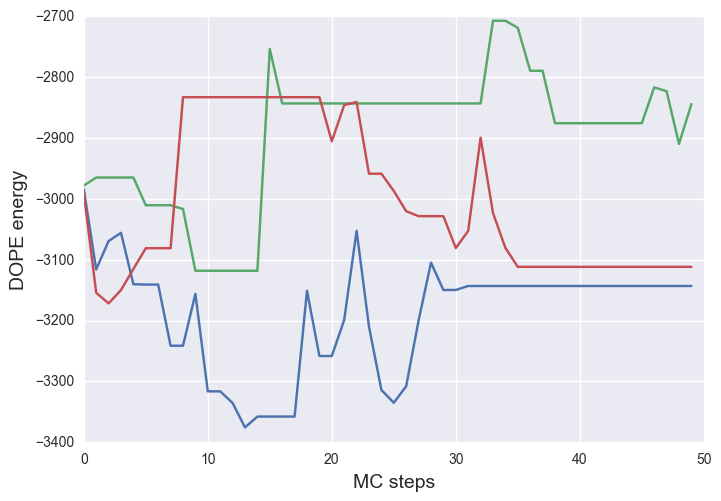

In [27]:
fig, ax = plt.subplots()
for k,v in mc_villin.models.iteritems():
    ax.plot(v['score'])

ax.set_ylabel('DOPE energy', fontsize=14)
ax.set_xlabel('MC steps', fontsize=14)

In [15]:
import Bio.PDB
import Bio.Seq
import Bio.SeqUtils
import Bio.pairwise2
import Bio.SeqRecord
import Bio.Align.AlignInfo
for k,v in mc_villin.models.iteritems():
    print "%3i %10.2f %s"%(k, v['score'][-1][0], \
        Bio.Seq.Seq(''.join([Bio.SeqUtils.seq1(x.get_resname()) \
                    for x in v['model'].get_residues()])))

  0   -2998.43 MLSDEDFKAVFGMTRSAFANLPLWKQQNLKKEKGLF


In [16]:
sequences = [Bio.SeqRecord.SeqRecord(Bio.Seq.Seq(''.join([Bio.SeqUtils.seq1(x.get_resname()) \
                    for x in v['model'].get_residues()]))) for k, v in mc_villin.models.iteritems() if v['score'][-1][0]<-3200.]
align =  Bio.Align.MultipleSeqAlignment(sequences)
summary_align = Bio.Align.AlignInfo.SummaryInfo(align)
print villin_des.seq
print summary_align.dumb_consensus(threshold=(0.1))
print summary_align.dumb_consensus(threshold=(0.2))
print summary_align.dumb_consensus(threshold=(0.5))


MLSDEDFKAVFGMTRSAFANLPLWKQQNLKKEKGLF





In [53]:
len(sequences)*0.2

15.8